In [1]:
import pandas as pd
import numpy as np
import os
import datetime,time
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import gc
import time

path = 'D:/Projects/MachineLearning/Data competition/Tabular/wsdm-biaduhaokan/data/'

In [2]:
train = pd.read_csv(path+'train_all_notag.csv')

In [3]:
#test = pd.read_csv(path+'test_all_notag.csv')

In [4]:
#test_id = test['UserId']
#train = train.drop(['UserId'],axis=1)
#test = test.drop(['UserId'],axis=1)

In [3]:
label = pd.read_csv(path+'all_data_label.csv')

In [4]:
train = pd.merge(train,label,on=['UserId'],how='left')

In [17]:
leak = pd.DataFrame()
leak['time'] = np.arange(23,24,0.001)
leak['pred'] = 0
pred=[]
for i in np.arange(23,24,0.001):
    ratio=len(train[['label','time_click_max']][train['time_click_max']>i ][train['label']==1])/len(train[['label','time_click_max']][train['time_click_max']>i ])
    pred.append(ratio)
    print('Time',i,'   Pred',ratio)

c:\users\shinelon\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Time 23.0    Pred 0.6819098744644316
Time 23.001    Pred 0.6819098744644316
Time 23.002000000000002    Pred 0.6819098744644316
Time 23.003000000000004    Pred 0.6819098744644316
Time 23.004000000000005    Pred 0.6819098744644316
Time 23.005000000000006    Pred 0.6819098744644316
Time 23.006000000000007    Pred 0.6819098744644316
Time 23.00700000000001    Pred 0.6819098744644316
Time 23.00800000000001    Pred 0.6819098744644316
Time 23.00900000000001    Pred 0.6819098744644316
Time 23.010000000000012    Pred 0.6819098744644316
Time 23.011000000000013    Pred 0.6819098744644316
Time 23.012000000000015    Pred 0.6819098744644316
Time 23.013000000000016    Pred 0.6819098744644316
Time 23.014000000000017    Pred 0.6819098744644316
Time 23.01500000000002    Pred 0.6819098744644316
Time 23.01600000000002    Pred 0.6819098744644316
Time 23.01700000000002    Pred 0.6846537583495392
Time 23.018000000000022    Pred 0.6846537583495392
Time 23.019000000000023    Pred 0.6846537583495392
Time 23.0200

Time 23.1640000000002    Pred 0.707177033492823
Time 23.1650000000002    Pred 0.707177033492823
Time 23.166000000000203    Pred 0.707177033492823
Time 23.167000000000204    Pred 0.7105165872166553
Time 23.168000000000205    Pred 0.7105165872166553
Time 23.169000000000207    Pred 0.7105165872166553
Time 23.170000000000208    Pred 0.7105165872166553
Time 23.17100000000021    Pred 0.7105165872166553
Time 23.17200000000021    Pred 0.7105165872166553
Time 23.17300000000021    Pred 0.7105165872166553
Time 23.174000000000213    Pred 0.7105165872166553
Time 23.175000000000214    Pred 0.7105165872166553
Time 23.176000000000215    Pred 0.7105165872166553
Time 23.177000000000216    Pred 0.7105165872166553
Time 23.178000000000218    Pred 0.7105165872166553
Time 23.17900000000022    Pred 0.7105165872166553
Time 23.18000000000022    Pred 0.7105165872166553
Time 23.18100000000022    Pred 0.7105165872166553
Time 23.182000000000222    Pred 0.7105165872166553
Time 23.183000000000224    Pred 0.7105165872

Time 23.3260000000004    Pred 0.7438301736860029
Time 23.3270000000004    Pred 0.7438301736860029
Time 23.3280000000004    Pred 0.7438301736860029
Time 23.329000000000402    Pred 0.7438301736860029
Time 23.330000000000403    Pred 0.7438301736860029
Time 23.331000000000405    Pred 0.7438301736860029
Time 23.332000000000406    Pred 0.7438301736860029
Time 23.333000000000407    Pred 0.7438301736860029
Time 23.334000000000408    Pred 0.7480420468984637
Time 23.33500000000041    Pred 0.7480420468984637
Time 23.33600000000041    Pred 0.7480420468984637
Time 23.337000000000412    Pred 0.7480420468984637
Time 23.338000000000413    Pred 0.7480420468984637
Time 23.339000000000414    Pred 0.7480420468984637
Time 23.340000000000416    Pred 0.7480420468984637
Time 23.341000000000417    Pred 0.7480420468984637
Time 23.342000000000418    Pred 0.7480420468984637
Time 23.34300000000042    Pred 0.7480420468984637
Time 23.34400000000042    Pred 0.7480420468984637
Time 23.34500000000042    Pred 0.74804204

Time 23.4900000000006    Pred 0.7895560497487851
Time 23.4910000000006    Pred 0.7895560497487851
Time 23.4920000000006    Pred 0.7895560497487851
Time 23.493000000000603    Pred 0.7895560497487851
Time 23.494000000000604    Pred 0.7895560497487851
Time 23.495000000000605    Pred 0.7895560497487851
Time 23.496000000000606    Pred 0.7895560497487851
Time 23.497000000000607    Pred 0.7895560497487851
Time 23.49800000000061    Pred 0.7895560497487851
Time 23.49900000000061    Pred 0.7895560497487851
Time 23.50000000000061    Pred 0.7944598648610761
Time 23.501000000000612    Pred 0.7944598648610761
Time 23.502000000000614    Pred 0.7944598648610761
Time 23.503000000000615    Pred 0.7944598648610761
Time 23.504000000000616    Pred 0.7944598648610761
Time 23.505000000000617    Pred 0.7944598648610761
Time 23.50600000000062    Pred 0.7944598648610761
Time 23.50700000000062    Pred 0.7944598648610761
Time 23.50800000000062    Pred 0.7944598648610761
Time 23.509000000000622    Pred 0.794459864

Time 23.653000000000798    Pred 0.8500239414460633
Time 23.6540000000008    Pred 0.8500239414460633
Time 23.6550000000008    Pred 0.8500239414460633
Time 23.6560000000008    Pred 0.8500239414460633
Time 23.657000000000803    Pred 0.8500239414460633
Time 23.658000000000804    Pred 0.8500239414460633
Time 23.659000000000805    Pred 0.8500239414460633
Time 23.660000000000807    Pred 0.8500239414460633
Time 23.661000000000808    Pred 0.8500239414460633
Time 23.66200000000081    Pred 0.8500239414460633
Time 23.66300000000081    Pred 0.8500239414460633
Time 23.66400000000081    Pred 0.8500239414460633
Time 23.665000000000813    Pred 0.8500239414460633
Time 23.666000000000814    Pred 0.8500239414460633
Time 23.667000000000815    Pred 0.8557931203415334
Time 23.668000000000816    Pred 0.8557931203415334
Time 23.669000000000818    Pred 0.8557931203415334
Time 23.67000000000082    Pred 0.8557931203415334
Time 23.67100000000082    Pred 0.8557931203415334
Time 23.67200000000082    Pred 0.855793120

Time 23.817000000001    Pred 0.9264993937132731
Time 23.818000000001    Pred 0.9264993937132731
Time 23.819000000001    Pred 0.9264993937132731
Time 23.820000000001002    Pred 0.9264993937132731
Time 23.821000000001003    Pred 0.9264993937132731
Time 23.822000000001005    Pred 0.9264993937132731
Time 23.823000000001006    Pred 0.9264993937132731
Time 23.824000000001007    Pred 0.9264993937132731
Time 23.82500000000101    Pred 0.9264993937132731
Time 23.82600000000101    Pred 0.9264993937132731
Time 23.82700000000101    Pred 0.9264993937132731
Time 23.828000000001012    Pred 0.9264993937132731
Time 23.829000000001013    Pred 0.9264993937132731
Time 23.830000000001014    Pred 0.9264993937132731
Time 23.831000000001016    Pred 0.9264993937132731
Time 23.832000000001017    Pred 0.9264993937132731
Time 23.833000000001018    Pred 0.9264993937132731
Time 23.83400000000102    Pred 0.9343062130899507
Time 23.83500000000102    Pred 0.9343062130899507
Time 23.83600000000102    Pred 0.934306213089

Time 23.979000000001196    Pred 0.9965831435079726
Time 23.980000000001198    Pred 0.9965831435079726
Time 23.9810000000012    Pred 0.9965831435079726
Time 23.9820000000012    Pred 0.9965831435079726
Time 23.9830000000012    Pred 0.9965831435079726


ZeroDivisionError: division by zero

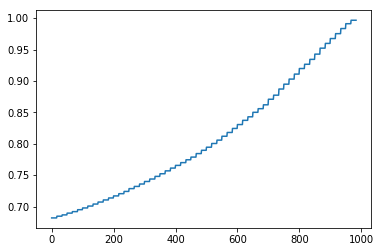

In [27]:
import matplotlib.pyplot as plt
x = list(range(len(pred)))
y = pred
plt.plot(x,y)

In [13]:
leak['pred'].max()

0.03026659286796742

In [6]:
y = label['label'].reset_index().drop(['index'],axis=1)
del label

In [7]:
from sklearn.preprocessing import LabelEncoder
def label_encode(df, feature):
    print("Start label_encode")
    st = time.time()

    df[feature] = df[feature].replace('-', np.nan)
    le = LabelEncoder()
    for col in feature:
        df[col] = le.fit_transform(df[col].astype(str))

    print('END label_encode', (time.time()-st), 's')
    return df

In [8]:
col = ['fav_click_type','fav_like_type','fav_play_type','fav_show_type']
train = label_encode(train,col)
#test = label_encode(test,col)

Start label_encode
END label_encode 6.887557029724121 s


In [9]:
def get_interval_ratio_feat(user_df):
    interval_cols = ['show_count_all','show_count', 'click_count', 'comment_count','like_count','share_count', 'video_id_sum',
                     'video_tag_sum','video_creator_sum','diff_time_play_count_x','diff_time_show_count_x','diff_time_click_count_x','diff_time_like_count_x',
                     'time_play_count','time_show_count', 'time_click_count','time_like_count','replay_creator_count','reshow_creator_count', 'reclick_creator_count',
                     'replay_video_count', 'reshow_video_count','reclick_video_count', 'replay_type_count','reshow_type_count',
                     'reclick_type_count','diff_time_play_count_y','diff_time_show_count_y', 'diff_time_click_count_y',
                     'diff_time_like_count_y', 'fav_play_type_count','fav_show_type_count', 'fav_click_type_count','fav_like_type_count','interval_sum']
    for col in interval_cols:
        user_df[col + '_interval_cnt_ratio'] = user_df[col] / user_df['interval_cnt']
        user_df[col + '_interval_sum_ratio'] = user_df[col] / user_df['interval_sum']
        user_df[col + '_interval_max_ratio'] = user_df[col] / user_df['interval_max']
        user_df[col + '_interval_min_ratio'] = user_df[col] / user_df['interval_min']
        user_df[col + '_interval_mean_ratio'] = user_df[col] / user_df['interval_mean']
        user_df[col + '_interval_median_ratio'] = user_df[col] / user_df['interval_median']
        user_df[col + '_interval_diff_ratio'] = user_df[col] / user_df['interval_diff']

    return user_df

In [10]:
train = get_interval_ratio_feat(train)
#test = get_interval_ratio_feat(test)

In [11]:
gc.collect()

630

In [12]:
cate_feature = ['gender','age','edu','play_mday','play_weekday','play_isweekend','fav_click_type','fav_like_type','fav_play_type','fav_show_type']
feature = list(train.columns)

In [22]:
lgb_model = LGBMClassifier(
    boosting_type="gbdt",num_leaves=50, reg_alpha=3, reg_lambda=3,
    max_depth=-1, n_estimators=10000,
    subsample=0.8, colsample_bytree=0.8, subsample_freq=1,
    learning_rate=0.01, random_state=1230,n_jobs=-1,
)

best_score = []
skf = StratifiedKFold(n_splits=5, random_state=2018, shuffle=True)
st = time.time()
for index, (train_index, test_index) in enumerate(skf.split(train,y)):
    print('Start',index+1,' Fold')
    train_x, test_x, train_y, test_y = train.loc[train_index], train.loc[test_index], y.loc[train_index], y.loc[test_index]
    eval_set = [(train_x, train_y), (test_x, test_y)]
    lgb_model.fit(train_x, train_y, eval_set=eval_set, eval_metric='auc', categorical_feature=cate_feature,
                  early_stopping_rounds=100)
    fi = pd.DataFrame()
    fi['fi'] = lgb_model.feature_importances_
    fi['key'] = featuretrai
    print(fi.sort_values('fi'))
    best_score.append(lgb_model.best_score_['valid_1']['auc'])
    print(best_score)
    print('END',index+1,' Fold',(time.time() - st), 's')
    if index ==0:
        break
    #test_pred = lgb_model.predict_proba(test,
    #                                    num_iteration=lgb_model.best_iteration_)[:, 1]
    #predict_result['rentention_rate'] = predict_result['rentention_rate'] + test_pred

#predict_result['rentention_rate'] = predict_result['rentention_rate'] / 5
score_mean = np.mean(best_score)
print(score_mean)
#mean = predict_result['rentention_rate'].mean()
#print('mean:', mean)

Start 1  Fold


c:\users\shinelon\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shinelon\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shinelon\appdata\local\programs\python\python36\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['age', 'edu', 'fav_click_type', 'fav_like_type', 'fav_play_type', 'fav_show_type', 'gender', 'play_isweekend', 'play_mday', 'play_weekday']
  warnings.warn('categorical_feature in Dataset is overridden. New categori

[1]	training's auc: 0.722716	valid_1's auc: 0.723436
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.726222	valid_1's auc: 0.726727
[3]	training's auc: 0.727361	valid_1's auc: 0.727931
[4]	training's auc: 0.727784	valid_1's auc: 0.728318
[5]	training's auc: 0.728005	valid_1's auc: 0.728575
[6]	training's auc: 0.728125	valid_1's auc: 0.728768
[7]	training's auc: 0.72816	valid_1's auc: 0.728719
[8]	training's auc: 0.728203	valid_1's auc: 0.728884
[9]	training's auc: 0.728272	valid_1's auc: 0.728945
[10]	training's auc: 0.728354	valid_1's auc: 0.72904
[11]	training's auc: 0.728619	valid_1's auc: 0.729279
[12]	training's auc: 0.728701	valid_1's auc: 0.729371
[13]	training's auc: 0.728727	valid_1's auc: 0.729358
[14]	training's auc: 0.728783	valid_1's auc: 0.729419
[15]	training's auc: 0.728746	valid_1's auc: 0.729362
[16]	training's auc: 0.728727	valid_1's auc: 0.729314
[17]	training's auc: 0.728811	valid_1's auc: 0.729384
[18]	training's auc: 0.728798	

[152]	training's auc: 0.733962	valid_1's auc: 0.733942
[153]	training's auc: 0.734002	valid_1's auc: 0.733978
[154]	training's auc: 0.73405	valid_1's auc: 0.734016
[155]	training's auc: 0.734089	valid_1's auc: 0.734047
[156]	training's auc: 0.734115	valid_1's auc: 0.734066
[157]	training's auc: 0.734164	valid_1's auc: 0.734103
[158]	training's auc: 0.734204	valid_1's auc: 0.734129
[159]	training's auc: 0.734232	valid_1's auc: 0.73415
[160]	training's auc: 0.734272	valid_1's auc: 0.734175
[161]	training's auc: 0.734308	valid_1's auc: 0.734205
[162]	training's auc: 0.73434	valid_1's auc: 0.734234
[163]	training's auc: 0.734383	valid_1's auc: 0.734263
[164]	training's auc: 0.734421	valid_1's auc: 0.734297
[165]	training's auc: 0.734465	valid_1's auc: 0.734328
[166]	training's auc: 0.734506	valid_1's auc: 0.734362
[167]	training's auc: 0.734549	valid_1's auc: 0.734398
[168]	training's auc: 0.734596	valid_1's auc: 0.734438
[169]	training's auc: 0.734639	valid_1's auc: 0.734476
[170]	trainin

[302]	training's auc: 0.739216	valid_1's auc: 0.737821
[303]	training's auc: 0.73925	valid_1's auc: 0.737851
[304]	training's auc: 0.739285	valid_1's auc: 0.737877
[305]	training's auc: 0.739313	valid_1's auc: 0.737893
[306]	training's auc: 0.739341	valid_1's auc: 0.737911
[307]	training's auc: 0.739376	valid_1's auc: 0.737937
[308]	training's auc: 0.739414	valid_1's auc: 0.737967
[309]	training's auc: 0.739442	valid_1's auc: 0.737988
[310]	training's auc: 0.739476	valid_1's auc: 0.738009
[311]	training's auc: 0.739507	valid_1's auc: 0.738032
[312]	training's auc: 0.739539	valid_1's auc: 0.738053
[313]	training's auc: 0.739575	valid_1's auc: 0.738088
[314]	training's auc: 0.739611	valid_1's auc: 0.738108
[315]	training's auc: 0.739649	valid_1's auc: 0.738133
[316]	training's auc: 0.739681	valid_1's auc: 0.738158
[317]	training's auc: 0.739716	valid_1's auc: 0.738186
[318]	training's auc: 0.739739	valid_1's auc: 0.738198
[319]	training's auc: 0.739768	valid_1's auc: 0.738217
[320]	train

[452]	training's auc: 0.74354	valid_1's auc: 0.740462
[453]	training's auc: 0.74357	valid_1's auc: 0.740483
[454]	training's auc: 0.7436	valid_1's auc: 0.740505
[455]	training's auc: 0.743627	valid_1's auc: 0.740522
[456]	training's auc: 0.743658	valid_1's auc: 0.740545
[457]	training's auc: 0.74368	valid_1's auc: 0.740557
[458]	training's auc: 0.743706	valid_1's auc: 0.740569
[459]	training's auc: 0.743734	valid_1's auc: 0.740584
[460]	training's auc: 0.74376	valid_1's auc: 0.740596
[461]	training's auc: 0.743776	valid_1's auc: 0.740608
[462]	training's auc: 0.743804	valid_1's auc: 0.740627
[463]	training's auc: 0.74383	valid_1's auc: 0.740643
[464]	training's auc: 0.743855	valid_1's auc: 0.74066
[465]	training's auc: 0.743882	valid_1's auc: 0.740676
[466]	training's auc: 0.74391	valid_1's auc: 0.740692
[467]	training's auc: 0.74394	valid_1's auc: 0.740709
[468]	training's auc: 0.743964	valid_1's auc: 0.740722
[469]	training's auc: 0.743989	valid_1's auc: 0.740736
[470]	training's auc

[602]	training's auc: 0.746912	valid_1's auc: 0.742057
[603]	training's auc: 0.746927	valid_1's auc: 0.742062
[604]	training's auc: 0.746953	valid_1's auc: 0.742075
[605]	training's auc: 0.746978	valid_1's auc: 0.742088
[606]	training's auc: 0.746998	valid_1's auc: 0.742096
[607]	training's auc: 0.747018	valid_1's auc: 0.742104
[608]	training's auc: 0.747039	valid_1's auc: 0.742112
[609]	training's auc: 0.747058	valid_1's auc: 0.742116
[610]	training's auc: 0.747083	valid_1's auc: 0.742125
[611]	training's auc: 0.747103	valid_1's auc: 0.742129
[612]	training's auc: 0.747122	valid_1's auc: 0.742138
[613]	training's auc: 0.74714	valid_1's auc: 0.742143
[614]	training's auc: 0.747157	valid_1's auc: 0.742152
[615]	training's auc: 0.747175	valid_1's auc: 0.742157
[616]	training's auc: 0.747192	valid_1's auc: 0.74216
[617]	training's auc: 0.747212	valid_1's auc: 0.742169
[618]	training's auc: 0.74723	valid_1's auc: 0.742172
[619]	training's auc: 0.747251	valid_1's auc: 0.742183
[620]	trainin

[752]	training's auc: 0.749585	valid_1's auc: 0.74299
[753]	training's auc: 0.749604	valid_1's auc: 0.742992
[754]	training's auc: 0.749618	valid_1's auc: 0.742995
[755]	training's auc: 0.749632	valid_1's auc: 0.742997
[756]	training's auc: 0.749649	valid_1's auc: 0.743003
[757]	training's auc: 0.749664	valid_1's auc: 0.743006
[758]	training's auc: 0.749682	valid_1's auc: 0.743013
[759]	training's auc: 0.749698	valid_1's auc: 0.743016
[760]	training's auc: 0.749712	valid_1's auc: 0.743023
[761]	training's auc: 0.749728	valid_1's auc: 0.743024
[762]	training's auc: 0.749743	valid_1's auc: 0.743029
[763]	training's auc: 0.749758	valid_1's auc: 0.743034
[764]	training's auc: 0.749773	valid_1's auc: 0.743036
[765]	training's auc: 0.749786	valid_1's auc: 0.743041
[766]	training's auc: 0.749802	valid_1's auc: 0.743045
[767]	training's auc: 0.74982	valid_1's auc: 0.743052
[768]	training's auc: 0.749835	valid_1's auc: 0.743061
[769]	training's auc: 0.74985	valid_1's auc: 0.743065
[770]	trainin

[902]	training's auc: 0.751766	valid_1's auc: 0.743529
[903]	training's auc: 0.751779	valid_1's auc: 0.743531
[904]	training's auc: 0.751793	valid_1's auc: 0.743533
[905]	training's auc: 0.751807	valid_1's auc: 0.743536
[906]	training's auc: 0.75182	valid_1's auc: 0.743538
[907]	training's auc: 0.751835	valid_1's auc: 0.74354
[908]	training's auc: 0.751849	valid_1's auc: 0.743546
[909]	training's auc: 0.751864	valid_1's auc: 0.743551
[910]	training's auc: 0.751877	valid_1's auc: 0.743553
[911]	training's auc: 0.751892	valid_1's auc: 0.743558
[912]	training's auc: 0.751909	valid_1's auc: 0.743563
[913]	training's auc: 0.751924	valid_1's auc: 0.743568
[914]	training's auc: 0.751942	valid_1's auc: 0.743572
[915]	training's auc: 0.751948	valid_1's auc: 0.743572
[916]	training's auc: 0.751958	valid_1's auc: 0.743573
[917]	training's auc: 0.751969	valid_1's auc: 0.743576
[918]	training's auc: 0.751989	valid_1's auc: 0.743578
[919]	training's auc: 0.752001	valid_1's auc: 0.743583
[920]	traini

[1051]	training's auc: 0.753648	valid_1's auc: 0.743876
[1052]	training's auc: 0.753656	valid_1's auc: 0.743875
[1053]	training's auc: 0.753666	valid_1's auc: 0.743874
[1054]	training's auc: 0.753679	valid_1's auc: 0.743878
[1055]	training's auc: 0.753689	valid_1's auc: 0.743881
[1056]	training's auc: 0.753705	valid_1's auc: 0.743882
[1057]	training's auc: 0.753717	valid_1's auc: 0.743882
[1058]	training's auc: 0.753726	valid_1's auc: 0.743883
[1059]	training's auc: 0.753738	valid_1's auc: 0.743883
[1060]	training's auc: 0.753751	valid_1's auc: 0.743884
[1061]	training's auc: 0.753763	valid_1's auc: 0.743885
[1062]	training's auc: 0.753775	valid_1's auc: 0.743888
[1063]	training's auc: 0.753784	valid_1's auc: 0.74389
[1064]	training's auc: 0.753793	valid_1's auc: 0.74389
[1065]	training's auc: 0.753808	valid_1's auc: 0.74389
[1066]	training's auc: 0.753821	valid_1's auc: 0.743893
[1067]	training's auc: 0.753832	valid_1's auc: 0.743897
[1068]	training's auc: 0.753846	valid_1's auc: 0.74

[1198]	training's auc: 0.755302	valid_1's auc: 0.744113
[1199]	training's auc: 0.75532	valid_1's auc: 0.744121
[1200]	training's auc: 0.755331	valid_1's auc: 0.744124
[1201]	training's auc: 0.75534	valid_1's auc: 0.744126
[1202]	training's auc: 0.755353	valid_1's auc: 0.744129
[1203]	training's auc: 0.755366	valid_1's auc: 0.744131
[1204]	training's auc: 0.755377	valid_1's auc: 0.744133
[1205]	training's auc: 0.755385	valid_1's auc: 0.744133
[1206]	training's auc: 0.755397	valid_1's auc: 0.744133
[1207]	training's auc: 0.755406	valid_1's auc: 0.744135
[1208]	training's auc: 0.755417	valid_1's auc: 0.744137
[1209]	training's auc: 0.75543	valid_1's auc: 0.74414
[1210]	training's auc: 0.755441	valid_1's auc: 0.744139
[1211]	training's auc: 0.755452	valid_1's auc: 0.744139
[1212]	training's auc: 0.755461	valid_1's auc: 0.744141
[1213]	training's auc: 0.755474	valid_1's auc: 0.744144
[1214]	training's auc: 0.755485	valid_1's auc: 0.744145
[1215]	training's auc: 0.755495	valid_1's auc: 0.744

[1345]	training's auc: 0.756819	valid_1's auc: 0.744269
[1346]	training's auc: 0.756827	valid_1's auc: 0.744269
[1347]	training's auc: 0.75684	valid_1's auc: 0.744269
[1348]	training's auc: 0.75685	valid_1's auc: 0.74427
[1349]	training's auc: 0.756863	valid_1's auc: 0.74427
[1350]	training's auc: 0.756873	valid_1's auc: 0.74427
[1351]	training's auc: 0.756884	valid_1's auc: 0.74427
[1352]	training's auc: 0.756889	valid_1's auc: 0.74427
[1353]	training's auc: 0.756896	valid_1's auc: 0.744271
[1354]	training's auc: 0.756906	valid_1's auc: 0.744271
[1355]	training's auc: 0.756917	valid_1's auc: 0.744269
[1356]	training's auc: 0.756929	valid_1's auc: 0.744271
[1357]	training's auc: 0.756937	valid_1's auc: 0.744271
[1358]	training's auc: 0.756948	valid_1's auc: 0.74427
[1359]	training's auc: 0.756957	valid_1's auc: 0.744271
[1360]	training's auc: 0.756965	valid_1's auc: 0.744273
[1361]	training's auc: 0.756975	valid_1's auc: 0.744273
[1362]	training's auc: 0.756985	valid_1's auc: 0.744272


[1493]	training's auc: 0.758269	valid_1's auc: 0.74438
[1494]	training's auc: 0.758278	valid_1's auc: 0.744381
[1495]	training's auc: 0.758289	valid_1's auc: 0.744379
[1496]	training's auc: 0.758298	valid_1's auc: 0.744381
[1497]	training's auc: 0.758305	valid_1's auc: 0.744381
[1498]	training's auc: 0.758316	valid_1's auc: 0.74438
[1499]	training's auc: 0.758329	valid_1's auc: 0.744381
[1500]	training's auc: 0.758339	valid_1's auc: 0.744382
[1501]	training's auc: 0.758349	valid_1's auc: 0.744384
[1502]	training's auc: 0.758357	valid_1's auc: 0.744386
[1503]	training's auc: 0.758368	valid_1's auc: 0.744385
[1504]	training's auc: 0.758374	valid_1's auc: 0.744385
[1505]	training's auc: 0.758386	valid_1's auc: 0.744386
[1506]	training's auc: 0.758398	valid_1's auc: 0.744387
[1507]	training's auc: 0.758404	valid_1's auc: 0.744388
[1508]	training's auc: 0.758414	valid_1's auc: 0.744388
[1509]	training's auc: 0.758424	valid_1's auc: 0.744389
[1510]	training's auc: 0.758434	valid_1's auc: 0.7

[1640]	training's auc: 0.759661	valid_1's auc: 0.744461
[1641]	training's auc: 0.75967	valid_1's auc: 0.744462
[1642]	training's auc: 0.759676	valid_1's auc: 0.744461
[1643]	training's auc: 0.759684	valid_1's auc: 0.744461
[1644]	training's auc: 0.759693	valid_1's auc: 0.74446
[1645]	training's auc: 0.7597	valid_1's auc: 0.744462
[1646]	training's auc: 0.759712	valid_1's auc: 0.744464
[1647]	training's auc: 0.75972	valid_1's auc: 0.744464
[1648]	training's auc: 0.759732	valid_1's auc: 0.744467
[1649]	training's auc: 0.759745	valid_1's auc: 0.744468
[1650]	training's auc: 0.759752	valid_1's auc: 0.744468
[1651]	training's auc: 0.759762	valid_1's auc: 0.744469
[1652]	training's auc: 0.75977	valid_1's auc: 0.744469
[1653]	training's auc: 0.75978	valid_1's auc: 0.744468
[1654]	training's auc: 0.759787	valid_1's auc: 0.744467
[1655]	training's auc: 0.759797	valid_1's auc: 0.744468
[1656]	training's auc: 0.759804	valid_1's auc: 0.744469
[1657]	training's auc: 0.759811	valid_1's auc: 0.744471

[1788]	training's auc: 0.760963	valid_1's auc: 0.744511
[1789]	training's auc: 0.760971	valid_1's auc: 0.744511
[1790]	training's auc: 0.76098	valid_1's auc: 0.744512
[1791]	training's auc: 0.760992	valid_1's auc: 0.744513
[1792]	training's auc: 0.760998	valid_1's auc: 0.744512
[1793]	training's auc: 0.761008	valid_1's auc: 0.744511
[1794]	training's auc: 0.761015	valid_1's auc: 0.744513
[1795]	training's auc: 0.761028	valid_1's auc: 0.744513
[1796]	training's auc: 0.761036	valid_1's auc: 0.744514
[1797]	training's auc: 0.761044	valid_1's auc: 0.744513
[1798]	training's auc: 0.761051	valid_1's auc: 0.744512
[1799]	training's auc: 0.761059	valid_1's auc: 0.744513
[1800]	training's auc: 0.76107	valid_1's auc: 0.744513
[1801]	training's auc: 0.761076	valid_1's auc: 0.744511
[1802]	training's auc: 0.761086	valid_1's auc: 0.744512
[1803]	training's auc: 0.761091	valid_1's auc: 0.744512
[1804]	training's auc: 0.7611	valid_1's auc: 0.744514
[1805]	training's auc: 0.761112	valid_1's auc: 0.744

[1935]	training's auc: 0.762237	valid_1's auc: 0.744564
[1936]	training's auc: 0.762245	valid_1's auc: 0.744564
[1937]	training's auc: 0.76225	valid_1's auc: 0.744564
[1938]	training's auc: 0.762259	valid_1's auc: 0.744564
[1939]	training's auc: 0.762267	valid_1's auc: 0.744564
[1940]	training's auc: 0.762279	valid_1's auc: 0.744567
[1941]	training's auc: 0.762286	valid_1's auc: 0.744567
[1942]	training's auc: 0.762297	valid_1's auc: 0.744567
[1943]	training's auc: 0.762305	valid_1's auc: 0.744566
[1944]	training's auc: 0.76231	valid_1's auc: 0.744566
[1945]	training's auc: 0.762319	valid_1's auc: 0.744566
[1946]	training's auc: 0.76233	valid_1's auc: 0.744568
[1947]	training's auc: 0.762338	valid_1's auc: 0.744568
[1948]	training's auc: 0.762347	valid_1's auc: 0.744567
[1949]	training's auc: 0.762355	valid_1's auc: 0.744566
[1950]	training's auc: 0.762363	valid_1's auc: 0.744566
[1951]	training's auc: 0.762369	valid_1's auc: 0.744566
[1952]	training's auc: 0.762375	valid_1's auc: 0.74

[2082]	training's auc: 0.76342	valid_1's auc: 0.744628
[2083]	training's auc: 0.763429	valid_1's auc: 0.744629
[2084]	training's auc: 0.763438	valid_1's auc: 0.74463
[2085]	training's auc: 0.763451	valid_1's auc: 0.744631
[2086]	training's auc: 0.763461	valid_1's auc: 0.744632
[2087]	training's auc: 0.76347	valid_1's auc: 0.744633
[2088]	training's auc: 0.763476	valid_1's auc: 0.744631
[2089]	training's auc: 0.763483	valid_1's auc: 0.744633
[2090]	training's auc: 0.763491	valid_1's auc: 0.744632
[2091]	training's auc: 0.763497	valid_1's auc: 0.744631
[2092]	training's auc: 0.763502	valid_1's auc: 0.744631
[2093]	training's auc: 0.763507	valid_1's auc: 0.744632
[2094]	training's auc: 0.763515	valid_1's auc: 0.744633
[2095]	training's auc: 0.763521	valid_1's auc: 0.744634
[2096]	training's auc: 0.763529	valid_1's auc: 0.744634
[2097]	training's auc: 0.763538	valid_1's auc: 0.744634
[2098]	training's auc: 0.763545	valid_1's auc: 0.744632
[2099]	training's auc: 0.763553	valid_1's auc: 0.74

[2229]	training's auc: 0.76454	valid_1's auc: 0.744658
[2230]	training's auc: 0.764546	valid_1's auc: 0.744659
[2231]	training's auc: 0.764553	valid_1's auc: 0.744659
[2232]	training's auc: 0.764559	valid_1's auc: 0.74466
[2233]	training's auc: 0.764566	valid_1's auc: 0.74466
[2234]	training's auc: 0.764572	valid_1's auc: 0.74466
[2235]	training's auc: 0.764582	valid_1's auc: 0.744662
[2236]	training's auc: 0.764587	valid_1's auc: 0.744662
[2237]	training's auc: 0.764593	valid_1's auc: 0.744663
[2238]	training's auc: 0.764604	valid_1's auc: 0.744664
[2239]	training's auc: 0.764607	valid_1's auc: 0.744664
[2240]	training's auc: 0.764618	valid_1's auc: 0.744667
[2241]	training's auc: 0.764626	valid_1's auc: 0.744667
[2242]	training's auc: 0.764633	valid_1's auc: 0.744668
[2243]	training's auc: 0.764639	valid_1's auc: 0.744667
[2244]	training's auc: 0.764644	valid_1's auc: 0.744667
[2245]	training's auc: 0.76465	valid_1's auc: 0.744667
[2246]	training's auc: 0.764657	valid_1's auc: 0.7446

[2376]	training's auc: 0.765628	valid_1's auc: 0.744687
[2377]	training's auc: 0.765634	valid_1's auc: 0.744689
[2378]	training's auc: 0.765637	valid_1's auc: 0.744689
[2379]	training's auc: 0.765649	valid_1's auc: 0.744691
[2380]	training's auc: 0.765656	valid_1's auc: 0.744691
[2381]	training's auc: 0.765659	valid_1's auc: 0.744691
[2382]	training's auc: 0.765667	valid_1's auc: 0.74469
[2383]	training's auc: 0.765673	valid_1's auc: 0.74469
[2384]	training's auc: 0.765683	valid_1's auc: 0.744691
[2385]	training's auc: 0.765688	valid_1's auc: 0.744691
[2386]	training's auc: 0.765695	valid_1's auc: 0.744691
[2387]	training's auc: 0.765702	valid_1's auc: 0.74469
[2388]	training's auc: 0.765711	valid_1's auc: 0.744689
[2389]	training's auc: 0.765719	valid_1's auc: 0.744688
[2390]	training's auc: 0.765727	valid_1's auc: 0.744686
[2391]	training's auc: 0.765733	valid_1's auc: 0.744685
[2392]	training's auc: 0.765744	valid_1's auc: 0.744684
[2393]	training's auc: 0.765752	valid_1's auc: 0.74

In [27]:
feature=fi['key'][fi['fi']>40]

In [28]:
train = train[feature]

In [29]:
gc.collect()

83

In [31]:
cate_feature = ['gender','age','edu','play_mday','play_weekday','fav_click_type','fav_like_type','fav_play_type','fav_show_type']
feature = list(train.columns)

In [32]:
lgb_model = LGBMClassifier(
    boosting_type="gbdt",num_leaves=50, reg_alpha=3, reg_lambda=3,
    max_depth=-1, n_estimators=10000,
    subsample=0.8, colsample_bytree=0.8, subsample_freq=1,
    learning_rate=0.01, random_state=1230,n_jobs=-1,
)

best_score = []
skf = StratifiedKFold(n_splits=5, random_state=2018, shuffle=True)
st = time.time()
for index, (train_index, test_index) in enumerate(skf.split(train,y)):
    print('Start',index+1,' Fold')
    train_x, test_x, train_y, test_y = train.loc[train_index], train.loc[test_index], y.loc[train_index], y.loc[test_index]
    eval_set = [(train_x, train_y), (test_x, test_y)]
    lgb_model.fit(train_x, train_y, eval_set=eval_set, eval_metric='auc', categorical_feature=cate_feature,
                  early_stopping_rounds=100)
    fi = pd.DataFrame()
    fi['fi'] = lgb_model.feature_importances_
    fi['key'] = feature
    print(fi.sort_values('fi'))
    best_score.append(lgb_model.best_score_['valid_1']['auc'])
    print(best_score)
    print('END',index+1,' Fold',(time.time() - st), 's')
    if index ==0:
        break
    #test_pred = lgb_model.predict_proba(test,
    #                                    num_iteration=lgb_model.best_iteration_)[:, 1]
    #predict_result['rentention_rate'] = predict_result['rentention_rate'] + test_pred

#predict_result['rentention_rate'] = predict_result['rentention_rate'] / 5
score_mean = np.mean(best_score)
print(score_mean)
#mean = predict_result['rentention_rate'].mean()
#print('mean:', mean)

Start 1  Fold


c:\users\shinelon\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shinelon\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shinelon\appdata\local\programs\python\python36\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['age', 'edu', 'fav_click_type', 'fav_like_type', 'fav_play_type', 'fav_show_type', 'gender', 'play_mday', 'play_weekday']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'

[1]	training's auc: 0.723503	valid_1's auc: 0.724153
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.726227	valid_1's auc: 0.72686
[3]	training's auc: 0.726896	valid_1's auc: 0.727515
[4]	training's auc: 0.727232	valid_1's auc: 0.727861
[5]	training's auc: 0.727307	valid_1's auc: 0.72798
[6]	training's auc: 0.727472	valid_1's auc: 0.728145
[7]	training's auc: 0.727484	valid_1's auc: 0.72813
[8]	training's auc: 0.727534	valid_1's auc: 0.728161
[9]	training's auc: 0.727768	valid_1's auc: 0.728385
[10]	training's auc: 0.727865	valid_1's auc: 0.728452
[11]	training's auc: 0.727929	valid_1's auc: 0.728519
[12]	training's auc: 0.728054	valid_1's auc: 0.728662
[13]	training's auc: 0.728047	valid_1's auc: 0.728642
[14]	training's auc: 0.728118	valid_1's auc: 0.728679
[15]	training's auc: 0.728148	valid_1's auc: 0.728724
[16]	training's auc: 0.728175	valid_1's auc: 0.728745
[17]	training's auc: 0.728263	valid_1's auc: 0.728786
[18]	training's auc: 0.728259	v

[152]	training's auc: 0.733948	valid_1's auc: 0.733908
[153]	training's auc: 0.733995	valid_1's auc: 0.733949
[154]	training's auc: 0.734029	valid_1's auc: 0.733983
[155]	training's auc: 0.734059	valid_1's auc: 0.734006
[156]	training's auc: 0.734093	valid_1's auc: 0.734039
[157]	training's auc: 0.734131	valid_1's auc: 0.734075
[158]	training's auc: 0.734176	valid_1's auc: 0.734108
[159]	training's auc: 0.73421	valid_1's auc: 0.734134
[160]	training's auc: 0.734241	valid_1's auc: 0.734157
[161]	training's auc: 0.734273	valid_1's auc: 0.734182
[162]	training's auc: 0.734317	valid_1's auc: 0.734217
[163]	training's auc: 0.734347	valid_1's auc: 0.73424
[164]	training's auc: 0.734384	valid_1's auc: 0.734266
[165]	training's auc: 0.734415	valid_1's auc: 0.734293
[166]	training's auc: 0.734455	valid_1's auc: 0.734323
[167]	training's auc: 0.734489	valid_1's auc: 0.734351
[168]	training's auc: 0.734529	valid_1's auc: 0.734378
[169]	training's auc: 0.734568	valid_1's auc: 0.734413
[170]	traini

[302]	training's auc: 0.739249	valid_1's auc: 0.73792
[303]	training's auc: 0.739282	valid_1's auc: 0.737943
[304]	training's auc: 0.739317	valid_1's auc: 0.737968
[305]	training's auc: 0.739343	valid_1's auc: 0.73799
[306]	training's auc: 0.73937	valid_1's auc: 0.738006
[307]	training's auc: 0.739403	valid_1's auc: 0.738029
[308]	training's auc: 0.739439	valid_1's auc: 0.738052
[309]	training's auc: 0.739479	valid_1's auc: 0.73808
[310]	training's auc: 0.739514	valid_1's auc: 0.738106
[311]	training's auc: 0.73954	valid_1's auc: 0.738131
[312]	training's auc: 0.739571	valid_1's auc: 0.738154
[313]	training's auc: 0.739613	valid_1's auc: 0.738192
[314]	training's auc: 0.739648	valid_1's auc: 0.738217
[315]	training's auc: 0.739683	valid_1's auc: 0.738235
[316]	training's auc: 0.739722	valid_1's auc: 0.738267
[317]	training's auc: 0.739758	valid_1's auc: 0.738292
[318]	training's auc: 0.739782	valid_1's auc: 0.738305
[319]	training's auc: 0.739808	valid_1's auc: 0.738316
[320]	training'

[452]	training's auc: 0.743634	valid_1's auc: 0.74062
[453]	training's auc: 0.743659	valid_1's auc: 0.740634
[454]	training's auc: 0.743683	valid_1's auc: 0.740646
[455]	training's auc: 0.74371	valid_1's auc: 0.740658
[456]	training's auc: 0.743731	valid_1's auc: 0.740666
[457]	training's auc: 0.743753	valid_1's auc: 0.740675
[458]	training's auc: 0.74378	valid_1's auc: 0.740689
[459]	training's auc: 0.743807	valid_1's auc: 0.740704
[460]	training's auc: 0.74384	valid_1's auc: 0.740726
[461]	training's auc: 0.743862	valid_1's auc: 0.740736
[462]	training's auc: 0.743893	valid_1's auc: 0.740754
[463]	training's auc: 0.743921	valid_1's auc: 0.74077
[464]	training's auc: 0.74395	valid_1's auc: 0.740783
[465]	training's auc: 0.74397	valid_1's auc: 0.740795
[466]	training's auc: 0.743994	valid_1's auc: 0.740803
[467]	training's auc: 0.744019	valid_1's auc: 0.740814
[468]	training's auc: 0.744046	valid_1's auc: 0.740834
[469]	training's auc: 0.74407	valid_1's auc: 0.740848
[470]	training's a

[602]	training's auc: 0.746953	valid_1's auc: 0.742135
[603]	training's auc: 0.746971	valid_1's auc: 0.742142
[604]	training's auc: 0.746995	valid_1's auc: 0.742156
[605]	training's auc: 0.747014	valid_1's auc: 0.742166
[606]	training's auc: 0.747029	valid_1's auc: 0.742175
[607]	training's auc: 0.747049	valid_1's auc: 0.742181
[608]	training's auc: 0.747072	valid_1's auc: 0.742191
[609]	training's auc: 0.747093	valid_1's auc: 0.742204
[610]	training's auc: 0.747112	valid_1's auc: 0.742209
[611]	training's auc: 0.747129	valid_1's auc: 0.742211
[612]	training's auc: 0.747147	valid_1's auc: 0.742219
[613]	training's auc: 0.747165	valid_1's auc: 0.742222
[614]	training's auc: 0.747183	valid_1's auc: 0.742228
[615]	training's auc: 0.7472	valid_1's auc: 0.742238
[616]	training's auc: 0.747224	valid_1's auc: 0.742247
[617]	training's auc: 0.747246	valid_1's auc: 0.742259
[618]	training's auc: 0.747268	valid_1's auc: 0.74227
[619]	training's auc: 0.747285	valid_1's auc: 0.742279
[620]	trainin

[752]	training's auc: 0.749574	valid_1's auc: 0.743018
[753]	training's auc: 0.74959	valid_1's auc: 0.743021
[754]	training's auc: 0.749606	valid_1's auc: 0.743026
[755]	training's auc: 0.74962	valid_1's auc: 0.743027
[756]	training's auc: 0.749637	valid_1's auc: 0.743034
[757]	training's auc: 0.749648	valid_1's auc: 0.743037
[758]	training's auc: 0.749662	valid_1's auc: 0.74304
[759]	training's auc: 0.749677	valid_1's auc: 0.743045
[760]	training's auc: 0.749693	valid_1's auc: 0.743048
[761]	training's auc: 0.749707	valid_1's auc: 0.743054
[762]	training's auc: 0.749719	valid_1's auc: 0.743059
[763]	training's auc: 0.749734	valid_1's auc: 0.743061
[764]	training's auc: 0.749747	valid_1's auc: 0.743066
[765]	training's auc: 0.749761	valid_1's auc: 0.743071
[766]	training's auc: 0.749777	valid_1's auc: 0.743074
[767]	training's auc: 0.749794	valid_1's auc: 0.743078
[768]	training's auc: 0.749807	valid_1's auc: 0.743081
[769]	training's auc: 0.749821	valid_1's auc: 0.743088
[770]	trainin

[902]	training's auc: 0.751761	valid_1's auc: 0.743571
[903]	training's auc: 0.751776	valid_1's auc: 0.743572
[904]	training's auc: 0.751791	valid_1's auc: 0.743574
[905]	training's auc: 0.751804	valid_1's auc: 0.743577
[906]	training's auc: 0.75182	valid_1's auc: 0.743583
[907]	training's auc: 0.751833	valid_1's auc: 0.743583
[908]	training's auc: 0.751848	valid_1's auc: 0.743587
[909]	training's auc: 0.75186	valid_1's auc: 0.743588
[910]	training's auc: 0.751871	valid_1's auc: 0.743589
[911]	training's auc: 0.751885	valid_1's auc: 0.743592
[912]	training's auc: 0.751899	valid_1's auc: 0.743598
[913]	training's auc: 0.751912	valid_1's auc: 0.743603
[914]	training's auc: 0.751924	valid_1's auc: 0.743605
[915]	training's auc: 0.751936	valid_1's auc: 0.743609
[916]	training's auc: 0.751948	valid_1's auc: 0.743612
[917]	training's auc: 0.75196	valid_1's auc: 0.743615
[918]	training's auc: 0.751972	valid_1's auc: 0.743621
[919]	training's auc: 0.751989	valid_1's auc: 0.743622
[920]	trainin

[1051]	training's auc: 0.753637	valid_1's auc: 0.743941
[1052]	training's auc: 0.753645	valid_1's auc: 0.74394
[1053]	training's auc: 0.753654	valid_1's auc: 0.743943
[1054]	training's auc: 0.753668	valid_1's auc: 0.743946
[1055]	training's auc: 0.753679	valid_1's auc: 0.743946
[1056]	training's auc: 0.753689	valid_1's auc: 0.74395
[1057]	training's auc: 0.753698	valid_1's auc: 0.743952
[1058]	training's auc: 0.753708	valid_1's auc: 0.743952
[1059]	training's auc: 0.75372	valid_1's auc: 0.743955
[1060]	training's auc: 0.753731	valid_1's auc: 0.743961
[1061]	training's auc: 0.753743	valid_1's auc: 0.743961
[1062]	training's auc: 0.75376	valid_1's auc: 0.743964
[1063]	training's auc: 0.753768	valid_1's auc: 0.743964
[1064]	training's auc: 0.753777	valid_1's auc: 0.743965
[1065]	training's auc: 0.753794	valid_1's auc: 0.74397
[1066]	training's auc: 0.753806	valid_1's auc: 0.743973
[1067]	training's auc: 0.753818	valid_1's auc: 0.743975
[1068]	training's auc: 0.753833	valid_1's auc: 0.7439

[1198]	training's auc: 0.755292	valid_1's auc: 0.744183
[1199]	training's auc: 0.755303	valid_1's auc: 0.744184
[1200]	training's auc: 0.755314	valid_1's auc: 0.744186
[1201]	training's auc: 0.755324	valid_1's auc: 0.744187
[1202]	training's auc: 0.755337	valid_1's auc: 0.744187
[1203]	training's auc: 0.755346	valid_1's auc: 0.744191
[1204]	training's auc: 0.755359	valid_1's auc: 0.744191
[1205]	training's auc: 0.755369	valid_1's auc: 0.744193
[1206]	training's auc: 0.75538	valid_1's auc: 0.744194
[1207]	training's auc: 0.755389	valid_1's auc: 0.744196
[1208]	training's auc: 0.755399	valid_1's auc: 0.744195
[1209]	training's auc: 0.75541	valid_1's auc: 0.744198
[1210]	training's auc: 0.755416	valid_1's auc: 0.744199
[1211]	training's auc: 0.75543	valid_1's auc: 0.744201
[1212]	training's auc: 0.755446	valid_1's auc: 0.744208
[1213]	training's auc: 0.755459	valid_1's auc: 0.74421
[1214]	training's auc: 0.75547	valid_1's auc: 0.744211
[1215]	training's auc: 0.755478	valid_1's auc: 0.7442

[1345]	training's auc: 0.756828	valid_1's auc: 0.744346
[1346]	training's auc: 0.756834	valid_1's auc: 0.744346
[1347]	training's auc: 0.756846	valid_1's auc: 0.744347
[1348]	training's auc: 0.756855	valid_1's auc: 0.744346
[1349]	training's auc: 0.756867	valid_1's auc: 0.744348
[1350]	training's auc: 0.756878	valid_1's auc: 0.744349
[1351]	training's auc: 0.756888	valid_1's auc: 0.74435
[1352]	training's auc: 0.7569	valid_1's auc: 0.74435
[1353]	training's auc: 0.756905	valid_1's auc: 0.744351
[1354]	training's auc: 0.756915	valid_1's auc: 0.744352
[1355]	training's auc: 0.756923	valid_1's auc: 0.744351
[1356]	training's auc: 0.756936	valid_1's auc: 0.744352
[1357]	training's auc: 0.756948	valid_1's auc: 0.744352
[1358]	training's auc: 0.756957	valid_1's auc: 0.744352
[1359]	training's auc: 0.756969	valid_1's auc: 0.744353
[1360]	training's auc: 0.75698	valid_1's auc: 0.744356
[1361]	training's auc: 0.756985	valid_1's auc: 0.744355
[1362]	training's auc: 0.756993	valid_1's auc: 0.7443

[1492]	training's auc: 0.758266	valid_1's auc: 0.744471
[1493]	training's auc: 0.758273	valid_1's auc: 0.74447
[1494]	training's auc: 0.758282	valid_1's auc: 0.744471
[1495]	training's auc: 0.758293	valid_1's auc: 0.744471
[1496]	training's auc: 0.7583	valid_1's auc: 0.744473
[1497]	training's auc: 0.758308	valid_1's auc: 0.744475
[1498]	training's auc: 0.758318	valid_1's auc: 0.744473
[1499]	training's auc: 0.758324	valid_1's auc: 0.744473
[1500]	training's auc: 0.758337	valid_1's auc: 0.744475
[1501]	training's auc: 0.758348	valid_1's auc: 0.744476
[1502]	training's auc: 0.758358	valid_1's auc: 0.744475
[1503]	training's auc: 0.758368	valid_1's auc: 0.744474
[1504]	training's auc: 0.758375	valid_1's auc: 0.744474
[1505]	training's auc: 0.758386	valid_1's auc: 0.744474
[1506]	training's auc: 0.758398	valid_1's auc: 0.744473
[1507]	training's auc: 0.758409	valid_1's auc: 0.744475
[1508]	training's auc: 0.758419	valid_1's auc: 0.744474
[1509]	training's auc: 0.75843	valid_1's auc: 0.744

[1639]	training's auc: 0.759634	valid_1's auc: 0.744545
[1640]	training's auc: 0.759642	valid_1's auc: 0.744545
[1641]	training's auc: 0.759653	valid_1's auc: 0.744547
[1642]	training's auc: 0.759659	valid_1's auc: 0.744547
[1643]	training's auc: 0.759671	valid_1's auc: 0.744549
[1644]	training's auc: 0.759681	valid_1's auc: 0.744551
[1645]	training's auc: 0.759688	valid_1's auc: 0.744551
[1646]	training's auc: 0.7597	valid_1's auc: 0.744553
[1647]	training's auc: 0.759712	valid_1's auc: 0.744553
[1648]	training's auc: 0.759719	valid_1's auc: 0.744554
[1649]	training's auc: 0.759731	valid_1's auc: 0.744555
[1650]	training's auc: 0.759737	valid_1's auc: 0.744554
[1651]	training's auc: 0.759748	valid_1's auc: 0.744555
[1652]	training's auc: 0.759758	valid_1's auc: 0.744556
[1653]	training's auc: 0.759768	valid_1's auc: 0.744557
[1654]	training's auc: 0.759779	valid_1's auc: 0.74456
[1655]	training's auc: 0.75979	valid_1's auc: 0.744563
[1656]	training's auc: 0.759796	valid_1's auc: 0.744

[1787]	training's auc: 0.760961	valid_1's auc: 0.744599
[1788]	training's auc: 0.760966	valid_1's auc: 0.7446
[1789]	training's auc: 0.760978	valid_1's auc: 0.7446
[1790]	training's auc: 0.760986	valid_1's auc: 0.744599
[1791]	training's auc: 0.760997	valid_1's auc: 0.7446
[1792]	training's auc: 0.761004	valid_1's auc: 0.744599
[1793]	training's auc: 0.761013	valid_1's auc: 0.744599
[1794]	training's auc: 0.761019	valid_1's auc: 0.744599
[1795]	training's auc: 0.76103	valid_1's auc: 0.744601
[1796]	training's auc: 0.761036	valid_1's auc: 0.744601
[1797]	training's auc: 0.761046	valid_1's auc: 0.744602
[1798]	training's auc: 0.761053	valid_1's auc: 0.744603
[1799]	training's auc: 0.761061	valid_1's auc: 0.744602
[1800]	training's auc: 0.761074	valid_1's auc: 0.744602
[1801]	training's auc: 0.761081	valid_1's auc: 0.744603
[1802]	training's auc: 0.76109	valid_1's auc: 0.744602
[1803]	training's auc: 0.761098	valid_1's auc: 0.744603
[1804]	training's auc: 0.761106	valid_1's auc: 0.744601


[1934]	training's auc: 0.76223	valid_1's auc: 0.744635
[1935]	training's auc: 0.762241	valid_1's auc: 0.744636
[1936]	training's auc: 0.762248	valid_1's auc: 0.744636
[1937]	training's auc: 0.762254	valid_1's auc: 0.744636
[1938]	training's auc: 0.762264	valid_1's auc: 0.744637
[1939]	training's auc: 0.762271	valid_1's auc: 0.744637
[1940]	training's auc: 0.76228	valid_1's auc: 0.744639
[1941]	training's auc: 0.762289	valid_1's auc: 0.744639
[1942]	training's auc: 0.762298	valid_1's auc: 0.744641
[1943]	training's auc: 0.762307	valid_1's auc: 0.744641
[1944]	training's auc: 0.762315	valid_1's auc: 0.744642
[1945]	training's auc: 0.762327	valid_1's auc: 0.744641
[1946]	training's auc: 0.762335	valid_1's auc: 0.744641
[1947]	training's auc: 0.762342	valid_1's auc: 0.744641
[1948]	training's auc: 0.762352	valid_1's auc: 0.74464
[1949]	training's auc: 0.76236	valid_1's auc: 0.74464
[1950]	training's auc: 0.762368	valid_1's auc: 0.74464
[1951]	training's auc: 0.762376	valid_1's auc: 0.74464

[2081]	training's auc: 0.763433	valid_1's auc: 0.74468
[2082]	training's auc: 0.76344	valid_1's auc: 0.74468
[2083]	training's auc: 0.763449	valid_1's auc: 0.74468
[2084]	training's auc: 0.763455	valid_1's auc: 0.744681
[2085]	training's auc: 0.763467	valid_1's auc: 0.744683
[2086]	training's auc: 0.763479	valid_1's auc: 0.744683
[2087]	training's auc: 0.763486	valid_1's auc: 0.744683
[2088]	training's auc: 0.763493	valid_1's auc: 0.744683
[2089]	training's auc: 0.763501	valid_1's auc: 0.744683
[2090]	training's auc: 0.763506	valid_1's auc: 0.744684
[2091]	training's auc: 0.763514	valid_1's auc: 0.744684
[2092]	training's auc: 0.76352	valid_1's auc: 0.744683
[2093]	training's auc: 0.763525	valid_1's auc: 0.744682
[2094]	training's auc: 0.763532	valid_1's auc: 0.744683
[2095]	training's auc: 0.763542	valid_1's auc: 0.744683
[2096]	training's auc: 0.763549	valid_1's auc: 0.744682
[2097]	training's auc: 0.763553	valid_1's auc: 0.744682
[2098]	training's auc: 0.763559	valid_1's auc: 0.7446

[2229]	training's auc: 0.764612	valid_1's auc: 0.744704
[2230]	training's auc: 0.76462	valid_1's auc: 0.744704
[2231]	training's auc: 0.764625	valid_1's auc: 0.744704
[2232]	training's auc: 0.764635	valid_1's auc: 0.744705
[2233]	training's auc: 0.764643	valid_1's auc: 0.744706
[2234]	training's auc: 0.764649	valid_1's auc: 0.744706
[2235]	training's auc: 0.764659	valid_1's auc: 0.744705
[2236]	training's auc: 0.764665	valid_1's auc: 0.744703
[2237]	training's auc: 0.764672	valid_1's auc: 0.744705
[2238]	training's auc: 0.764678	valid_1's auc: 0.744705
[2239]	training's auc: 0.764683	valid_1's auc: 0.744705
[2240]	training's auc: 0.764694	valid_1's auc: 0.744703
[2241]	training's auc: 0.764702	valid_1's auc: 0.744705
[2242]	training's auc: 0.764708	valid_1's auc: 0.744706
[2243]	training's auc: 0.764715	valid_1's auc: 0.744706
[2244]	training's auc: 0.764722	valid_1's auc: 0.744706
[2245]	training's auc: 0.764728	valid_1's auc: 0.744706
[2246]	training's auc: 0.764735	valid_1's auc: 0.

[2376]	training's auc: 0.765748	valid_1's auc: 0.744723
[2377]	training's auc: 0.765754	valid_1's auc: 0.744724
[2378]	training's auc: 0.765761	valid_1's auc: 0.744723
[2379]	training's auc: 0.765767	valid_1's auc: 0.744724
[2380]	training's auc: 0.76578	valid_1's auc: 0.744723
[2381]	training's auc: 0.765783	valid_1's auc: 0.744722
[2382]	training's auc: 0.765789	valid_1's auc: 0.744724
[2383]	training's auc: 0.765795	valid_1's auc: 0.744723
[2384]	training's auc: 0.765803	valid_1's auc: 0.744724
[2385]	training's auc: 0.765808	valid_1's auc: 0.744723
[2386]	training's auc: 0.765813	valid_1's auc: 0.744724
[2387]	training's auc: 0.76582	valid_1's auc: 0.744725
[2388]	training's auc: 0.765831	valid_1's auc: 0.744725
[2389]	training's auc: 0.76584	valid_1's auc: 0.744724
[2390]	training's auc: 0.765845	valid_1's auc: 0.744725
[2391]	training's auc: 0.765851	valid_1's auc: 0.744722
[2392]	training's auc: 0.765859	valid_1's auc: 0.74472
[2393]	training's auc: 0.765866	valid_1's auc: 0.744

NameError: name 'featuretrai' is not defined

In [35]:
lgb_model.best_score_

defaultdict(dict,
            {'training': {'auc': 0.7659425100363905},
             'valid_1': {'auc': 0.7447252096497202}})

In [37]:
train['is_play=show']=0
train['is_play=show'][train['fav_play_type']==train['fav_play_type']]

0

In [12]:
feature =list(train.columns)

In [13]:
play_feature =[]
for _f in feature:
    if 'play' in _f:
        play_feature.append(_f)

In [16]:
play_feature

['play_mday',
 'play_yday',
 'play_duration',
 'diff_time_play_count_x',
 'diff_time_play_var_x',
 'diff_time_play_mean_x',
 'diff_time_play_median_x',
 'diff_time_play_mad_x',
 'diff_time_play_skew_x',
 'diff_time_play_kurt_x',
 'diff_time_play_max_x',
 'time_play_count',
 'time_play_var',
 'time_play_mean',
 'time_play_median',
 'time_play_mad',
 'time_play_skew',
 'time_play_kurt',
 'time_play_max',
 'play_weekday',
 'play_isweekend',
 'replay_creator_max',
 'replay_creator_mean',
 'replay_creator_count',
 'replay_video_max',
 'replay_video_mean',
 'replay_video_count',
 'replay_type_max',
 'replay_type_mean',
 'replay_type_count',
 'diff_time_play_count_y',
 'diff_time_play_var_y',
 'diff_time_play_mean_y',
 'diff_time_play_median_y',
 'diff_time_play_mad_y',
 'diff_time_play_skew_y',
 'diff_time_play_kurt_y',
 'diff_time_play_max_y',
 'diff2_time_play_max',
 'fav_play_type',
 'fav_play_type_count',
 'fav_play_type_ratio',
 'diff_time_play_count_x_interval_cnt_ratio',
 'diff_time_p

In [21]:
for i in ['play_mday','play_yday','play_duration','play_weekday']:
    play_feature.remove(i)

In [22]:
train=train.drop(play_feature,axis=1)

In [23]:
cate_feature = ['gender','age','edu','play_mday','play_weekday','fav_click_type','fav_like_type','fav_show_type']
feature = list(train.columns)

In [24]:
lgb_model = LGBMClassifier(
    boosting_type="gbdt",num_leaves=50, reg_alpha=3, reg_lambda=3,
    max_depth=-1, n_estimators=10000,
    subsample=0.8, colsample_bytree=0.8, subsample_freq=1,
    learning_rate=0.01, random_state=1230,n_jobs=-1,
)

best_score = []
skf = StratifiedKFold(n_splits=5, random_state=2018, shuffle=True)
st = time.time()
for index, (train_index, test_index) in enumerate(skf.split(train,y)):
    print('Start',index+1,' Fold')
    train_x, test_x, train_y, test_y = train.loc[train_index], train.loc[test_index], y.loc[train_index], y.loc[test_index]
    eval_set = [(train_x, train_y), (test_x, test_y)]
    lgb_model.fit(train_x, train_y, eval_set=eval_set, eval_metric='auc', categorical_feature=cate_feature,
                  early_stopping_rounds=100)
    fi = pd.DataFrame()
    fi['fi'] = lgb_model.feature_importances_
    fi['key'] = feature
    print(fi.sort_values('fi'))
    best_score.append(lgb_model.best_score_['valid_1']['auc'])
    print(best_score)
    print('END',index+1,' Fold',(time.time() - st), 's')
    if index ==0:
        break
    #test_pred = lgb_model.predict_proba(test,
    #                                    num_iteration=lgb_model.best_iteration_)[:, 1]
    #predict_result['rentention_rate'] = predict_result['rentention_rate'] + test_pred

#predict_result['rentention_rate'] = predict_result['rentention_rate'] / 5
score_mean = np.mean(best_score)
print(score_mean)
#mean = predict_result['rentention_rate'].mean()
#print('mean:', mean)

Start 1  Fold


c:\users\shinelon\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shinelon\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shinelon\appdata\local\programs\python\python36\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['age', 'edu', 'fav_click_type', 'fav_like_type', 'fav_show_type', 'gender', 'play_mday', 'play_weekday']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(li

[1]	training's auc: 0.719602	valid_1's auc: 0.720872
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.723121	valid_1's auc: 0.724062
[3]	training's auc: 0.724435	valid_1's auc: 0.725429
[4]	training's auc: 0.724783	valid_1's auc: 0.725771
[5]	training's auc: 0.72456	valid_1's auc: 0.725581
[6]	training's auc: 0.724864	valid_1's auc: 0.725871
[7]	training's auc: 0.725058	valid_1's auc: 0.726041
[8]	training's auc: 0.725219	valid_1's auc: 0.726115
[9]	training's auc: 0.725589	valid_1's auc: 0.726494
[10]	training's auc: 0.72551	valid_1's auc: 0.726429
[11]	training's auc: 0.725811	valid_1's auc: 0.726732
[12]	training's auc: 0.726022	valid_1's auc: 0.726981
[13]	training's auc: 0.726116	valid_1's auc: 0.727072
[14]	training's auc: 0.726163	valid_1's auc: 0.727127
[15]	training's auc: 0.726252	valid_1's auc: 0.727224
[16]	training's auc: 0.726272	valid_1's auc: 0.727234
[17]	training's auc: 0.726559	valid_1's auc: 0.727456
[18]	training's auc: 0.726493	

[152]	training's auc: 0.731846	valid_1's auc: 0.732045
[153]	training's auc: 0.731868	valid_1's auc: 0.732063
[154]	training's auc: 0.731901	valid_1's auc: 0.732085
[155]	training's auc: 0.731935	valid_1's auc: 0.732112
[156]	training's auc: 0.731961	valid_1's auc: 0.732138
[157]	training's auc: 0.731991	valid_1's auc: 0.732155
[158]	training's auc: 0.732031	valid_1's auc: 0.732186
[159]	training's auc: 0.73206	valid_1's auc: 0.732203
[160]	training's auc: 0.732093	valid_1's auc: 0.732239
[161]	training's auc: 0.732128	valid_1's auc: 0.732264
[162]	training's auc: 0.732165	valid_1's auc: 0.732298
[163]	training's auc: 0.732196	valid_1's auc: 0.732326
[164]	training's auc: 0.732238	valid_1's auc: 0.732356
[165]	training's auc: 0.732271	valid_1's auc: 0.732388
[166]	training's auc: 0.732291	valid_1's auc: 0.732405
[167]	training's auc: 0.732322	valid_1's auc: 0.732424
[168]	training's auc: 0.732344	valid_1's auc: 0.732441
[169]	training's auc: 0.732384	valid_1's auc: 0.732475
[170]	train

[302]	training's auc: 0.736781	valid_1's auc: 0.735618
[303]	training's auc: 0.736814	valid_1's auc: 0.735641
[304]	training's auc: 0.73684	valid_1's auc: 0.735651
[305]	training's auc: 0.736872	valid_1's auc: 0.735665
[306]	training's auc: 0.736904	valid_1's auc: 0.735686
[307]	training's auc: 0.736937	valid_1's auc: 0.735709
[308]	training's auc: 0.736962	valid_1's auc: 0.735726
[309]	training's auc: 0.736993	valid_1's auc: 0.735746
[310]	training's auc: 0.737033	valid_1's auc: 0.735773
[311]	training's auc: 0.737063	valid_1's auc: 0.735793
[312]	training's auc: 0.737095	valid_1's auc: 0.735812
[313]	training's auc: 0.737123	valid_1's auc: 0.735826
[314]	training's auc: 0.737163	valid_1's auc: 0.735856
[315]	training's auc: 0.737188	valid_1's auc: 0.735872
[316]	training's auc: 0.737216	valid_1's auc: 0.735883
[317]	training's auc: 0.737249	valid_1's auc: 0.735905
[318]	training's auc: 0.73728	valid_1's auc: 0.735924
[319]	training's auc: 0.737315	valid_1's auc: 0.735943
[320]	traini

[452]	training's auc: 0.740832	valid_1's auc: 0.738092
[453]	training's auc: 0.740857	valid_1's auc: 0.738112
[454]	training's auc: 0.740876	valid_1's auc: 0.738118
[455]	training's auc: 0.740896	valid_1's auc: 0.73813
[456]	training's auc: 0.740918	valid_1's auc: 0.738139
[457]	training's auc: 0.740946	valid_1's auc: 0.738153
[458]	training's auc: 0.740969	valid_1's auc: 0.73817
[459]	training's auc: 0.74099	valid_1's auc: 0.738177
[460]	training's auc: 0.741021	valid_1's auc: 0.738194
[461]	training's auc: 0.741044	valid_1's auc: 0.738206
[462]	training's auc: 0.741072	valid_1's auc: 0.738227
[463]	training's auc: 0.741097	valid_1's auc: 0.738239
[464]	training's auc: 0.741116	valid_1's auc: 0.738247
[465]	training's auc: 0.741143	valid_1's auc: 0.738266
[466]	training's auc: 0.741163	valid_1's auc: 0.73827
[467]	training's auc: 0.741184	valid_1's auc: 0.738281
[468]	training's auc: 0.741212	valid_1's auc: 0.738296
[469]	training's auc: 0.74123	valid_1's auc: 0.738303
[470]	training'

[602]	training's auc: 0.743867	valid_1's auc: 0.739498
[603]	training's auc: 0.743879	valid_1's auc: 0.739501
[604]	training's auc: 0.743895	valid_1's auc: 0.739507
[605]	training's auc: 0.743912	valid_1's auc: 0.739514
[606]	training's auc: 0.74393	valid_1's auc: 0.739517
[607]	training's auc: 0.743944	valid_1's auc: 0.739522
[608]	training's auc: 0.743964	valid_1's auc: 0.739529
[609]	training's auc: 0.743983	valid_1's auc: 0.73954
[610]	training's auc: 0.743999	valid_1's auc: 0.739544
[611]	training's auc: 0.744014	valid_1's auc: 0.73955
[612]	training's auc: 0.74403	valid_1's auc: 0.739556
[613]	training's auc: 0.744049	valid_1's auc: 0.739563
[614]	training's auc: 0.744066	valid_1's auc: 0.739569
[615]	training's auc: 0.744083	valid_1's auc: 0.739575
[616]	training's auc: 0.7441	valid_1's auc: 0.739581
[617]	training's auc: 0.744117	valid_1's auc: 0.739586
[618]	training's auc: 0.744137	valid_1's auc: 0.739597
[619]	training's auc: 0.74415	valid_1's auc: 0.739601
[620]	training's 

[752]	training's auc: 0.746141	valid_1's auc: 0.740193
[753]	training's auc: 0.746155	valid_1's auc: 0.740196
[754]	training's auc: 0.746166	valid_1's auc: 0.7402
[755]	training's auc: 0.74618	valid_1's auc: 0.740204
[756]	training's auc: 0.746199	valid_1's auc: 0.740212
[757]	training's auc: 0.74621	valid_1's auc: 0.740215
[758]	training's auc: 0.746223	valid_1's auc: 0.74022
[759]	training's auc: 0.746235	valid_1's auc: 0.740223
[760]	training's auc: 0.746247	valid_1's auc: 0.740222
[761]	training's auc: 0.746261	valid_1's auc: 0.740224
[762]	training's auc: 0.746278	valid_1's auc: 0.740225
[763]	training's auc: 0.746295	valid_1's auc: 0.740227
[764]	training's auc: 0.746309	valid_1's auc: 0.74023
[765]	training's auc: 0.746324	valid_1's auc: 0.740232
[766]	training's auc: 0.746338	valid_1's auc: 0.740236
[767]	training's auc: 0.746353	valid_1's auc: 0.740243
[768]	training's auc: 0.746366	valid_1's auc: 0.740248
[769]	training's auc: 0.746379	valid_1's auc: 0.740251
[770]	training's

[902]	training's auc: 0.74799	valid_1's auc: 0.74062
[903]	training's auc: 0.748	valid_1's auc: 0.74062
[904]	training's auc: 0.748015	valid_1's auc: 0.740625
[905]	training's auc: 0.748031	valid_1's auc: 0.740629
[906]	training's auc: 0.74804	valid_1's auc: 0.74063
[907]	training's auc: 0.748049	valid_1's auc: 0.740632
[908]	training's auc: 0.74806	valid_1's auc: 0.740635
[909]	training's auc: 0.748075	valid_1's auc: 0.74064
[910]	training's auc: 0.748085	valid_1's auc: 0.740643
[911]	training's auc: 0.748095	valid_1's auc: 0.740642
[912]	training's auc: 0.748108	valid_1's auc: 0.740646
[913]	training's auc: 0.748119	valid_1's auc: 0.740647
[914]	training's auc: 0.748134	valid_1's auc: 0.74065
[915]	training's auc: 0.748144	valid_1's auc: 0.740653
[916]	training's auc: 0.748156	valid_1's auc: 0.740654
[917]	training's auc: 0.748166	valid_1's auc: 0.740654
[918]	training's auc: 0.748182	valid_1's auc: 0.740658
[919]	training's auc: 0.748193	valid_1's auc: 0.740659
[920]	training's auc:

[1051]	training's auc: 0.749688	valid_1's auc: 0.740897
[1052]	training's auc: 0.749701	valid_1's auc: 0.740897
[1053]	training's auc: 0.749712	valid_1's auc: 0.740899
[1054]	training's auc: 0.749724	valid_1's auc: 0.740903
[1055]	training's auc: 0.749734	valid_1's auc: 0.740903
[1056]	training's auc: 0.749747	valid_1's auc: 0.740905
[1057]	training's auc: 0.749758	valid_1's auc: 0.740907
[1058]	training's auc: 0.749766	valid_1's auc: 0.74091
[1059]	training's auc: 0.749775	valid_1's auc: 0.740911
[1060]	training's auc: 0.749784	valid_1's auc: 0.740913
[1061]	training's auc: 0.749795	valid_1's auc: 0.740912
[1062]	training's auc: 0.749807	valid_1's auc: 0.740914
[1063]	training's auc: 0.749815	valid_1's auc: 0.740914
[1064]	training's auc: 0.749826	valid_1's auc: 0.740918
[1065]	training's auc: 0.749835	valid_1's auc: 0.74092
[1066]	training's auc: 0.749847	valid_1's auc: 0.740924
[1067]	training's auc: 0.74986	valid_1's auc: 0.740925
[1068]	training's auc: 0.749871	valid_1's auc: 0.74

[1198]	training's auc: 0.751214	valid_1's auc: 0.741085
[1199]	training's auc: 0.751222	valid_1's auc: 0.741087
[1200]	training's auc: 0.751231	valid_1's auc: 0.741089
[1201]	training's auc: 0.751238	valid_1's auc: 0.741089
[1202]	training's auc: 0.751252	valid_1's auc: 0.741091
[1203]	training's auc: 0.751261	valid_1's auc: 0.741091
[1204]	training's auc: 0.751273	valid_1's auc: 0.741093
[1205]	training's auc: 0.751284	valid_1's auc: 0.741099
[1206]	training's auc: 0.751293	valid_1's auc: 0.741101
[1207]	training's auc: 0.751303	valid_1's auc: 0.7411
[1208]	training's auc: 0.751311	valid_1's auc: 0.741102
[1209]	training's auc: 0.75132	valid_1's auc: 0.741102
[1210]	training's auc: 0.751329	valid_1's auc: 0.741102
[1211]	training's auc: 0.75134	valid_1's auc: 0.741102
[1212]	training's auc: 0.751351	valid_1's auc: 0.741105
[1213]	training's auc: 0.751364	valid_1's auc: 0.741106
[1214]	training's auc: 0.751372	valid_1's auc: 0.741107
[1215]	training's auc: 0.75138	valid_1's auc: 0.7411

[1345]	training's auc: 0.752599	valid_1's auc: 0.741223
[1346]	training's auc: 0.752608	valid_1's auc: 0.741223
[1347]	training's auc: 0.752619	valid_1's auc: 0.741221
[1348]	training's auc: 0.752627	valid_1's auc: 0.741222
[1349]	training's auc: 0.752639	valid_1's auc: 0.741224
[1350]	training's auc: 0.752649	valid_1's auc: 0.741224
[1351]	training's auc: 0.752656	valid_1's auc: 0.741226
[1352]	training's auc: 0.752669	valid_1's auc: 0.741229
[1353]	training's auc: 0.752674	valid_1's auc: 0.74123
[1354]	training's auc: 0.75268	valid_1's auc: 0.741229
[1355]	training's auc: 0.752688	valid_1's auc: 0.74123
[1356]	training's auc: 0.752701	valid_1's auc: 0.741233
[1357]	training's auc: 0.752709	valid_1's auc: 0.741234
[1358]	training's auc: 0.752717	valid_1's auc: 0.741235
[1359]	training's auc: 0.752726	valid_1's auc: 0.741236
[1360]	training's auc: 0.752736	valid_1's auc: 0.741236
[1361]	training's auc: 0.752743	valid_1's auc: 0.741235
[1362]	training's auc: 0.752753	valid_1's auc: 0.74

KeyboardInterrupt: 